In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model# import LinearRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split

In [114]:
%matplotlib inline

In [177]:
cereal = pd.read_csv("cereals.csv")
cerealmis = cereal[cereal.carbo == -1]
cereal = cereal[cereal >= 0]
cerealmiscol = cerealmis[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
cereal = cereal.dropna()
celist = list(cerealmiscol.iloc[0,:])

[100.0,
 5.0,
 2.0,
 0.0,
 2.7000000000000002,
 -1.0,
 110.0,
 0.0,
 1.0,
 1.0,
 0.67000000000000004]

In [144]:
#print(cereal.describe())
print("carbo", "sugars", "potass")
cereal_train, cereal_test = train_test_split(cereal)
#print(cereal_train.columns)
input_data = cereal_train[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
input_data_test = cereal_test[['calories', 'protein', 'fat', 'sodium', 'fiber', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
carbo = cereal_train[['carbo']]
carbo_test = cereal_test[["carbo"]]
input_data.head()

carbo sugars potass


,calories,protein,fat,sodium,fiber,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10,6,280,25,3,1,0.33
14,110,1,1,180,0,13,55,25,2,1,1.00
40,110,2,1,260,0,3,40,25,2,1,1.50
22,100,2,1,140,2,10,120,25,3,1,0.75
66,110,2,1,70,1,15,40,25,2,1,0.75


In [179]:
regr2 = linear_model.LinearRegression()
fit = regr2.fit(input_data, carbo)
print(regr2.score(input_data_test, carbo_test))
regr2.predict(celist)

0.933013196264


array([[ 16.40689543]])

In [43]:
names = cereal.pop('name')
mfr = cereal.pop('mfr')
protein = cereal.pop('type')
cereal.head()
pca = PCA(n_components=2)
pca.fit(cereal)
reduced_cereal = pca.transform(cereal)

In [44]:
reduced_cereal

array([[ -50.22468793, -180.7727469 ],
       [-148.55671338,  -24.3098366 ],
       [  74.31644781, -232.90274977],
       [ -46.62792086, -231.68597802],
       [  49.0094194 ,   92.80715984],
       [  22.40755025,   24.03344232],
       [ -28.02191741,   69.08509556],
       [  50.77438357,   -8.37130827],
       [  35.44457412,  -32.73940313],
       [  39.03851642,  -98.41537428],
       [  66.0421344 ,   55.18429872],
       [ 127.71469411,  -21.1910166 ],
       [  55.2144927 ,   46.21671984],
       [ -20.40588934,   -6.93176653],
       [  23.89813221,   39.02458741],
       [ 125.62887372,   59.51017385],
       [ 133.76647012,   48.47120809],
       [ -61.5867875 ,   82.42317562],
       [  22.94031361,   29.07969401],
       [ -25.74139275,  -61.74678696],
       [ -72.64175202,  104.85117907],
       [  65.89298752,   60.21308123],
       [ -22.60981627,  -21.97323954],
       [  30.69388048,   13.20220662],
       [ -28.02788361,   69.08444224],
       [  46.53982086,   

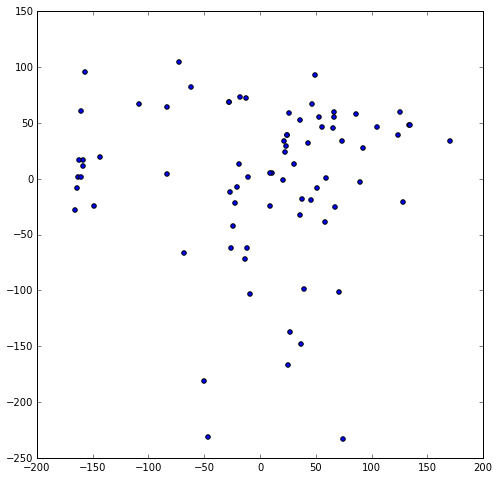

In [47]:
#red_datc = pd.DataFrame(reduced_cereal)
plt.figure(figsize = (8,8))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1])

In [49]:
kmeans = KMeans(3)
kmeans.fit(reduced_cereal)
cereal_cluster = kmeans.predict(reduced_cereal)

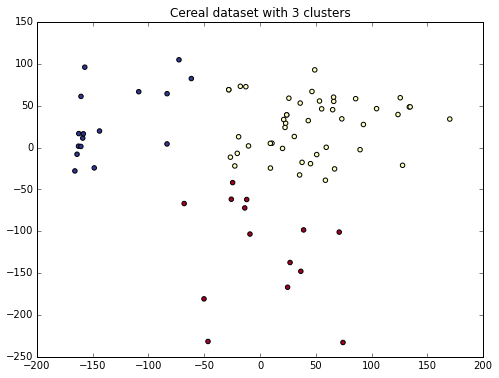

In [50]:

plt.figure(figsize=(8, 6))
plt.scatter(reduced_cereal[:,0], reduced_cereal[:,1], c=cereal_cluster, cmap="RdYlBu")
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Cereal dataset with 3 clusters")
plt.show()

In [69]:
cereal_cluster_list = cereal_cluster.tolist()
names_list = list(names)
zipped = zip(cereal_cluster_list, names_list)

In [70]:
#zipped1 = list(zipped)

In [77]:
pd.DataFrame(sorted(zipped1), columns=["Cluster", "Name"])

,Cluster,Name
0,0,100%_Bran
1,0,All-Bran
2,0,All-Bran_with_Extra_Fiber
3,0,Bran_Flakes
4,0,Cracklin'_Oat_Bran
5,0,"Fruit_&_Fibre_Dates,_Walnuts,_and_Oats"
6,0,Fruitful_Bran
7,0,"Muesli_Raisins,_Dates,_&_Almonds"
8,0,"Muesli_Raisins,_Peaches,_&_Pecans"
9,0,Mueslix_Crispy_Blend
